### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import plotly.express as plex
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [38]:
data = pd.read_csv('data/coupons.csv')

In [39]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Check if there are columns with missing values


In [40]:
print("check if there are columns with missing values")
data.isna().sum()

check if there are columns with missing values


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Check the percentage of the missing values

In [42]:
def check_percentage_for_missing_values(data):
    total_count = data.isnull().sum().sort_values(ascending = False)
    percentage = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100,2)
    return pd.concat([total_count, percentage], axis=1, keys=['Total','Percent'])

In [43]:
check_percentage_for_missing_values(data)

,Total,Percent
car,12576,99.15
CoffeeHouse,217,1.71
Restaurant20To50,189,1.49
CarryAway,151,1.19
RestaurantLessThan20,130,1.02
Bar,107,0.84
destination,0,0.00
passanger,0,0.00
direction_opp,0,0.00
direction_same,0,0.00


Plot to chcek if there are any missing values

In [44]:

y_axis = data['Y'].value_counts()

plex.bar(x=y_axis.index, y=y_axis, title='Y Value', width=600, height=400, color=y_axis.index)


3. Decide what to do about your missing data -- drop, replace, other...

Drop the car column as 99% is missingg

In [45]:
data.drop(['car'], axis=1, inplace=True)

Drop the duplicate values

In [46]:

data = data.drop_duplicates()



Pad the remaining columns where the percentage of missing data values is 1

In [47]:
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



In [48]:
proportion_accepted = data['Y'].mean()
proportion_accepted_percentage = proportion_accepted * 100
print(f"Proportion of total observations that accepted the coupon: {proportion_accepted_percentage:.2f}%")


Proportion of total observations that accepted the coupon: 56.76%


5. Use a bar plot to visualize the `coupon` column.

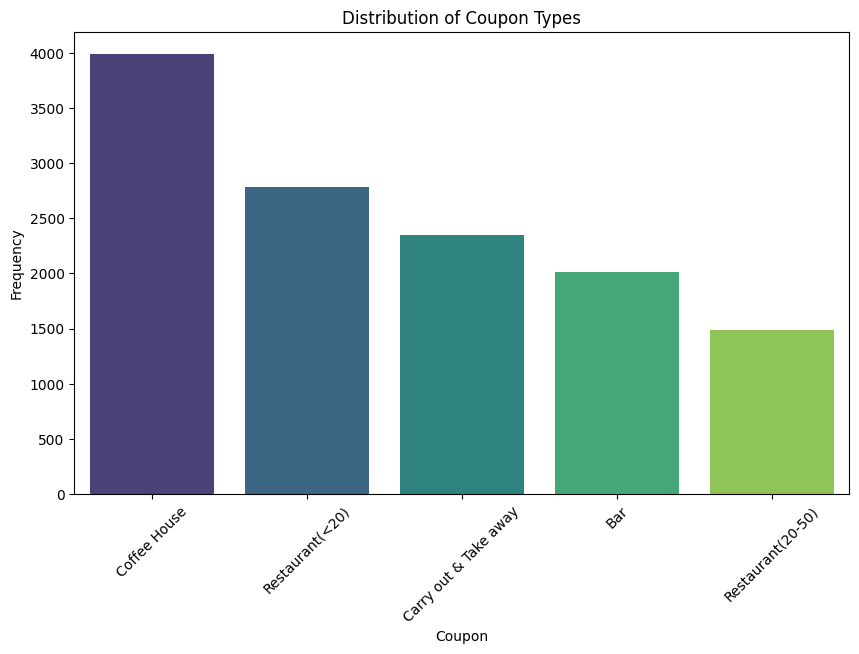

In [49]:
coupon_counts = data['coupon'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette='viridis')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Bar chart to visualise accepted and Not accepted

<Figure size 1200x800 with 0 Axes>

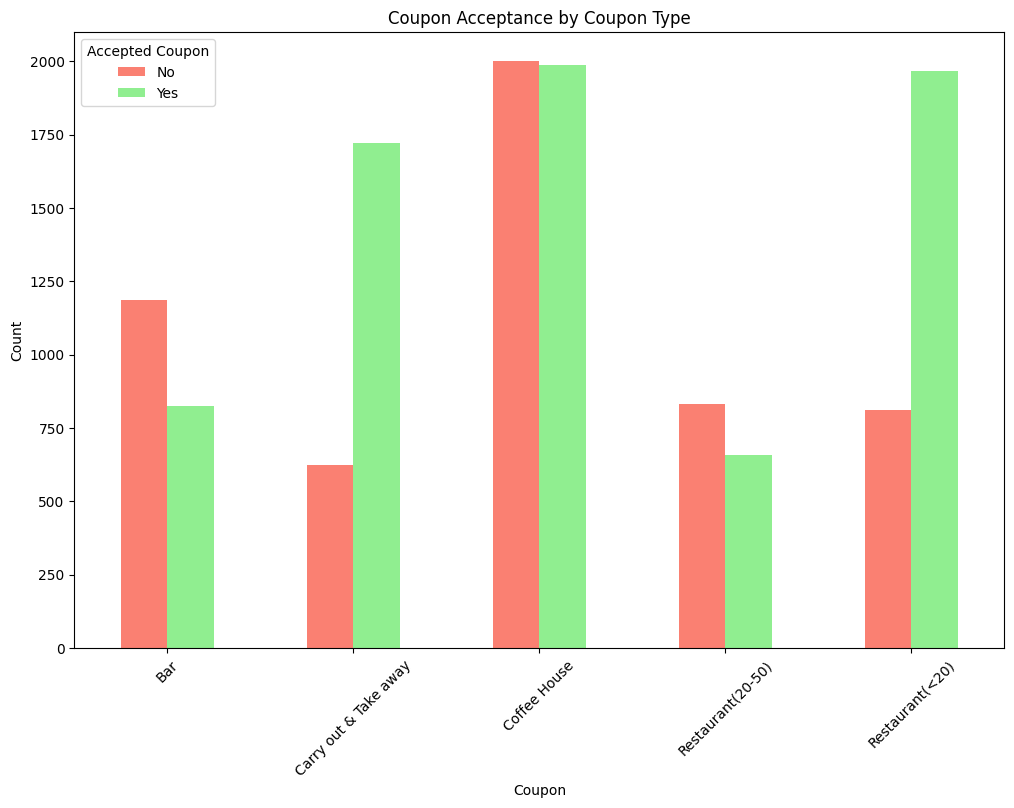

In [51]:
plt.figure(figsize=(12, 8))

coupon_acceptance = pd.crosstab(data['coupon'], data['Y'])

coupon_acceptance.plot(kind='bar', stacked=False, color=['salmon', 'lightgreen'], figsize=(12, 8))

plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Accepted Coupon', labels=['No', 'Yes'])
plt.show()


Create functions to calculate acceptance stats and perform univariate analysis

In [54]:
def calculate_acceptance_statistics(data, feature):
    """
    Calculate various statistics related to coupon acceptance for a given feature.

    Parameters:
    data (pandas.DataFrame): The DataFrame containing the dataset.
    feature (str): The name of the column/feature for which the statistics are calculated.

    Returns:
    pandas.DataFrame: A DataFrame containing the following columns:
        - feature: The unique values of the specified feature.
        - Total_Count: The total number of occurrences for each unique value.
        - Total_Percentage: The percentage of the total observations represented by each unique value.
        - Accepted_Count: The count of accepted coupons for each unique value.
        - Rejected_Count: The count of rejected coupons for each unique value.
        - Accepted_Percentage: The percentage of accepted coupons relative to the total count.
        - Rejected_Percentage: The percentage of rejected coupons relative to the total count.
    """
    unique_values = pd.DataFrame(sorted(data[feature].unique()), columns=[feature])
    unique_values['Total_Count'] = data.groupby(feature)['Y'].count().tolist()
    unique_values['Total_Percentage'] = round(unique_values['Total_Count'] / data.shape[0] * 100, 3)
    unique_values['Accepted_Count'] = data[data['Y'] == 1].groupby(feature)['Y'].count().tolist()
    unique_values['Rejected_Count'] = data[data['Y'] == 0].groupby(feature)['Y'].count().tolist()
    unique_values['Accepted_Percentage'] = round(unique_values['Accepted_Count'] / unique_values['Total_Count'] * 100, 3)
    unique_values['Rejected_Percentage'] = round(unique_values['Rejected_Count'] / unique_values['Total_Count'] * 100, 3)
    return unique_values

def perform_univariate_analysis(data, feature):
    """
    Perform univariate analysis on a specified feature and visualize the results.

    This function calculates acceptance statistics for the specified feature and generates a horizontal bar plot 
    to compare the total number of observations and the number of accepted coupons for each unique value of the feature.

    Parameters:
    data (pandas.DataFrame): The DataFrame containing the dataset.
    feature (str): The name of the column/feature to analyze.

    Returns:
    pandas.DataFrame: A DataFrame with the calculated acceptance statistics, sorted by the total count of each unique value.
    """
    acceptance_stats = calculate_acceptance_statistics(data, feature)
    acceptance_stats = acceptance_stats.sort_values(by='Total_Count', ascending=False)
    
    plt.figure(figsize=(8, 4))
    plt.barh(acceptance_stats[feature], acceptance_stats['Total_Count'], color='skyblue')
    plt.barh(acceptance_stats[feature], acceptance_stats['Accepted_Count'], color='lightgreen')
    plt.legend(labels=['Total', 'Accepted'])
    plt.xlabel('Counts')
    plt.title(f'{feature} wise Accepted Coupons')
    plt.show()

    return acceptance_stats


6. Use a histogram to visualize the temperature column.

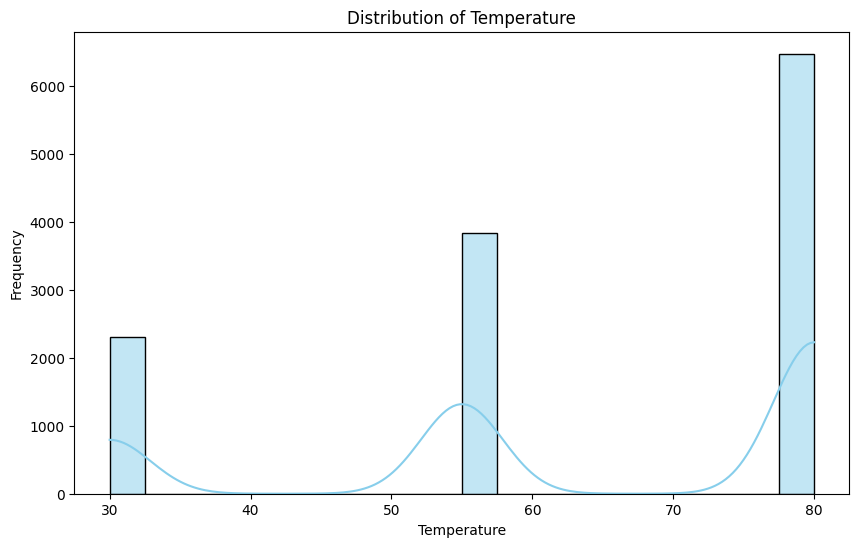

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [64]:
bar_coupons_data = data[data['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame to confirm
bar_coupons_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [65]:
bar_coupons_accepted_proportion = bar_coupons_data['Y'].mean()
bar_coupons_accepted_percentage = bar_coupons_accepted_proportion * 100
bar_coupons_accepted_percentage

40.99502487562189

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


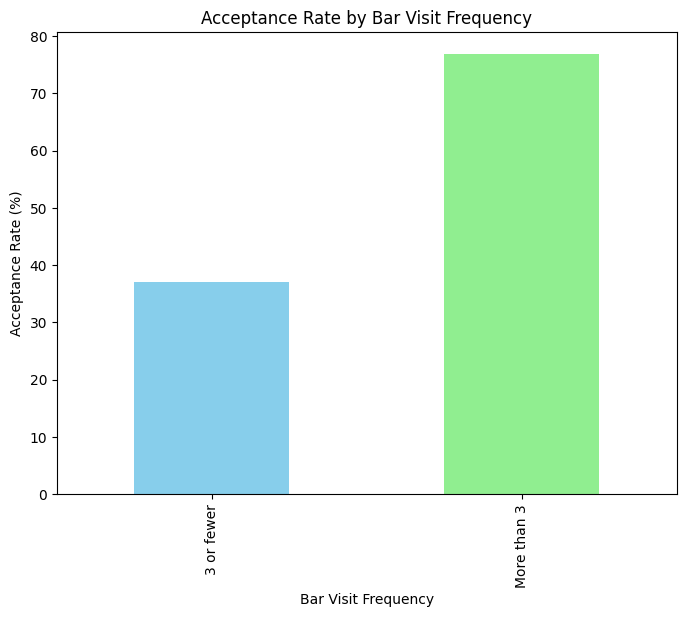

In [66]:
bar_coupons_data['Bar_Visit_Category'] = bar_coupons_data['Bar'].apply(lambda x: '3 or fewer' if x in ['never', 'less1', '1~3'] else 'More than 3')
acceptance_rate_by_category = bar_coupons_data.groupby('Bar_Visit_Category')['Y'].mean() * 100
plt.figure(figsize=(8, 6))
acceptance_rate_by_category.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate (%)')
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'Bar_Visit_Category', 'Numeric_Age',
       'Driver_Category', 'Driver_Category_Passengers_Occupation'],
      dtype='object')


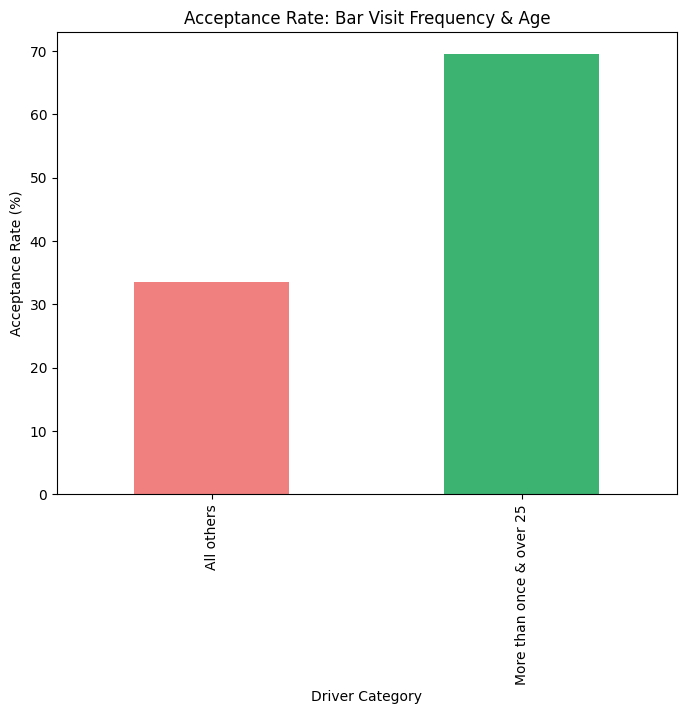

In [88]:
def convert_age(age):
    if '50plus' in age:
        return 50
    elif 'below21' in age:
        return 20
    else:
        return int(age)
    
print(bar_coupons_data.columns)

bar_coupons_data['Numeric_Age'] = bar_coupons_data['age'].apply(convert_age)

bar_coupons_data.columns

bar_coupons_data['Driver_Category'] = bar_coupons_data.apply(
    lambda row: 'More than once & over 25' if row['Bar'] not in ['never', 'less1'] and row['Numeric_Age'] > 25 else 'All others', 
    axis=1
)
acceptance_rate_by_driver_category = bar_coupons_data.groupby('Driver_Category')['Y'].mean() * 100

plt.figure(figsize=(8, 6))
acceptance_rate_by_driver_category.plot(kind='bar', color=['lightcoral', 'mediumseagreen'])
plt.title('Acceptance Rate: Bar Visit Frequency & Age')
plt.xlabel('Driver Category')
plt.ylabel('Acceptance Rate (%)')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


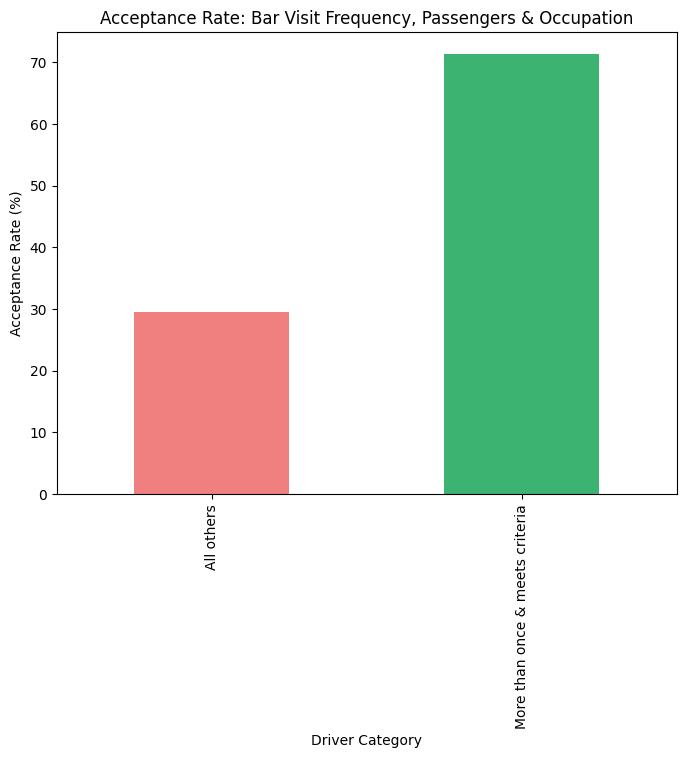

Driver_Category_Passengers_Occupation
All others                         29.540781
More than once & meets criteria    71.324864
Name: Y, dtype: float64

In [89]:
# Create a new column to categorize drivers based on bar visit frequency, passengers, and occupation
bar_coupons_data['Driver_Category_Passengers_Occupation'] = bar_coupons_data.apply(
    lambda row: 'More than once & meets criteria' if row['Bar'] not in ['never', 'less1'] 
                and row['passanger'] != 'Kid(s)' 
                and row['occupation'] not in ['Farming Fishing & Forestry'] 
                else 'All others', 
    axis=1
)

# Calculate the acceptance rate for each category
acceptance_rate_by_passenger_occupation_category = bar_coupons_data.groupby('Driver_Category_Passengers_Occupation')['Y'].mean() * 100

# Plot the acceptance rates
plt.figure(figsize=(8, 6))
acceptance_rate_by_passenger_occupation_category.plot(kind='bar', color=['lightcoral', 'mediumseagreen'])
plt.title('Acceptance Rate: Bar Visit Frequency, Passengers & Occupation')
plt.xlabel('Driver Category')
plt.ylabel('Acceptance Rate (%)')
plt.show()

acceptance_rate_by_passenger_occupation_category


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



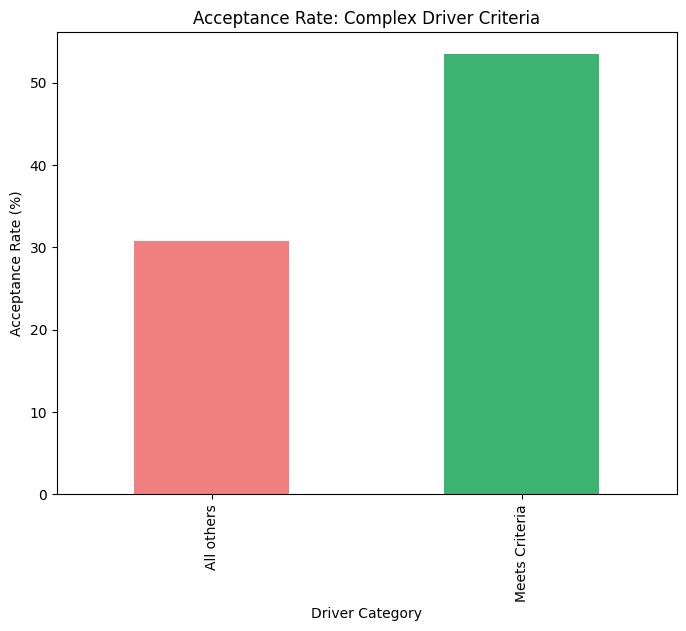

Driver_Category_Complex
All others        30.734361
Meets Criteria    53.472988
Name: Y, dtype: float64

In [90]:
bar_coupons_data['Driver_Category_Complex'] = bar_coupons_data.apply(
    lambda row: (
        'Meets Criteria' if 
        (row['Bar'] not in ['never', 'less1'] and row['passanger'] != 'Kid(s)' and row['maritalStatus'] != 'Widowed') or 
        (row['Bar'] not in ['never', 'less1'] and row['Numeric_Age'] < 30) or 
        (row['RestaurantLessThan20'] == '4~8' or row['RestaurantLessThan20'] == 'more than 8' and row['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])
    else 'All others'), 
    axis=1
)

# Calculate the acceptance rate for each category
acceptance_rate_by_complex_category = bar_coupons_data.groupby('Driver_Category_Complex')['Y'].mean() * 100

# Plot the acceptance rates
plt.figure(figsize=(8, 6))
acceptance_rate_by_complex_category.plot(kind='bar', color=['lightcoral', 'mediumseagreen'])
plt.title('Acceptance Rate: Complex Driver Criteria')
plt.xlabel('Driver Category')
plt.ylabel('Acceptance Rate (%)')
plt.show()

acceptance_rate_by_complex_category

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Frequent Bar Visitors Are More Likely to Accept Coupons:

The acceptance rate for those who visit bars more than 3 times a month is significantly higher than those who visit bars 3 or fewer times. This suggests that drivers who frequently visit bars may be more receptive to bar-related promotions and are more likely to use bar coupons.
Younger Drivers and Specific Demographics Show Higher Acceptance:

Drivers under 30 years old and those who go to bars more than once a month exhibit a higher acceptance rate for bar coupons. This demographic may be more socially active and more inclined to utilize discounts related to their social outings.
Occupation and Passenger Presence Influence Acceptance:

Drivers who go to bars more than once a month, do not have kids as passengers, and are not in occupations like farming, fishing, or forestry have a higher acceptance rate. This indicates that drivers in more urban or non-rural occupations, possibly with more disposable income or more social lifestyles, are more likely to take advantage of bar coupons.
Income and Dining Habits Are Linked to Acceptance:

Those who visit cheap restaurants frequently and have an income below $50,000 also show a higher acceptance rate for bar coupons. This group may be more price-sensitive and therefore more likely to use any available discounts.
Overall Hypothesis:
Drivers who are socially active, frequent bars and restaurants, and belong to specific demographic groups (younger age, non-rural occupations) are more likely to accept and use bar coupons. The data suggests a strong correlation between lifestyle factors and the likelihood of using bar-related promotions.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Time-wise coupon acceptance

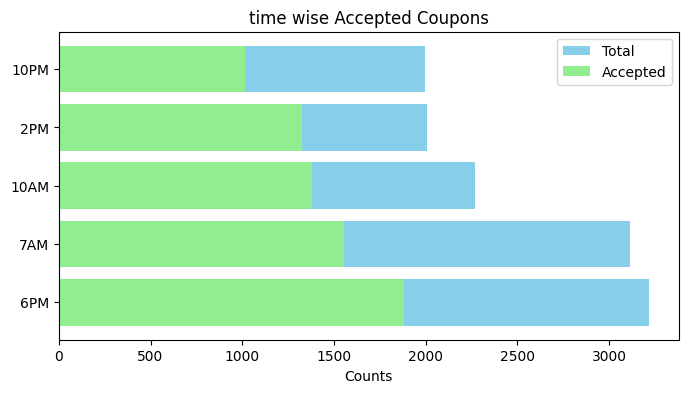

,time,Total_Count,Total_Percentage,Accepted_Count,Rejected_Count,Accepted_Percentage,Rejected_Percentage
3,6PM,3220,25.535,1881,1339,58.416,41.584
4,7AM,3114,24.695,1553,1561,49.872,50.128
0,10AM,2271,18.010,1380,891,60.766,39.234
2,2PM,2006,15.908,1327,679,66.152,33.848
1,10PM,1999,15.852,1016,983,50.825,49.175


In [91]:
perform_univariate_analysis(data,'time')


Observations:

Most of the time users go out when the time is 6 PM and 7 AM.
The users mostly accept coupons when the time is 2 PM and 10 AM.

Gender wise coupon acceptance

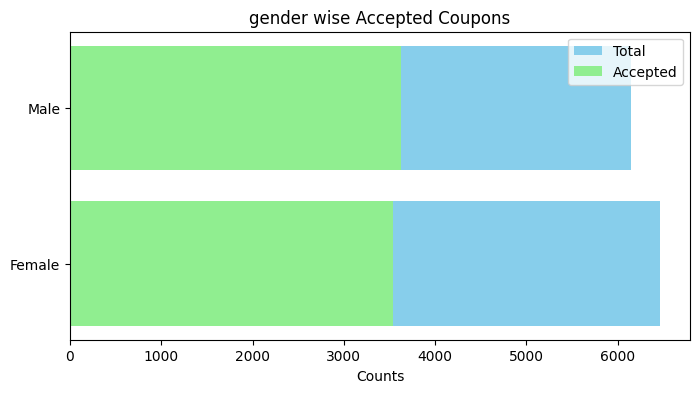

,gender,Total_Count,Total_Percentage,Accepted_Count,Rejected_Count,Accepted_Percentage,Rejected_Percentage
0,Female,6469,51.301,3535,2934,54.645,45.355
1,Male,6141,48.699,3622,2519,58.981,41.019


In [92]:
perform_univariate_analysis(data,'gender')


In [ ]:
Observations:

Male and Female both have almost similar coupon acceptance ratios.